# Proyecto 2
## Bioseñales y sistemas. 2024
### María J. Ostos, Cristian Florez, Juan A. Sañudo


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os
import scipy.signal as signal 

# from scipy.stats import zscore
# import math
# from collections import Counter
# import re  
# import seaborn as sns
# from scipy import stats
# from scipy.stats import mannwhitneyu

In [67]:
ruta="./otros/Diagnostics.xlsx"
df = pd.read_excel(ruta)

# Crear el nuevo dataframe filtrando por la columna 'Rhythm'
datos = df[(df['Rhythm'] == 'SB') | (df['Rhythm'] == 'AFIB')]

#Tamaño del nuevo dataframe
datos.shape

fs=500
tiempo = np.arange(0, datos.shape[0]/fs,1/fs)

datos.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
5,MUSE_20180112_120347_79000,SB,NONE,46,FEMALE,57,57,70,404,393,38,24,9,225,260,427
6,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395


In [69]:
tiempo.shape, datos.shape

((5669,), (5669, 16))

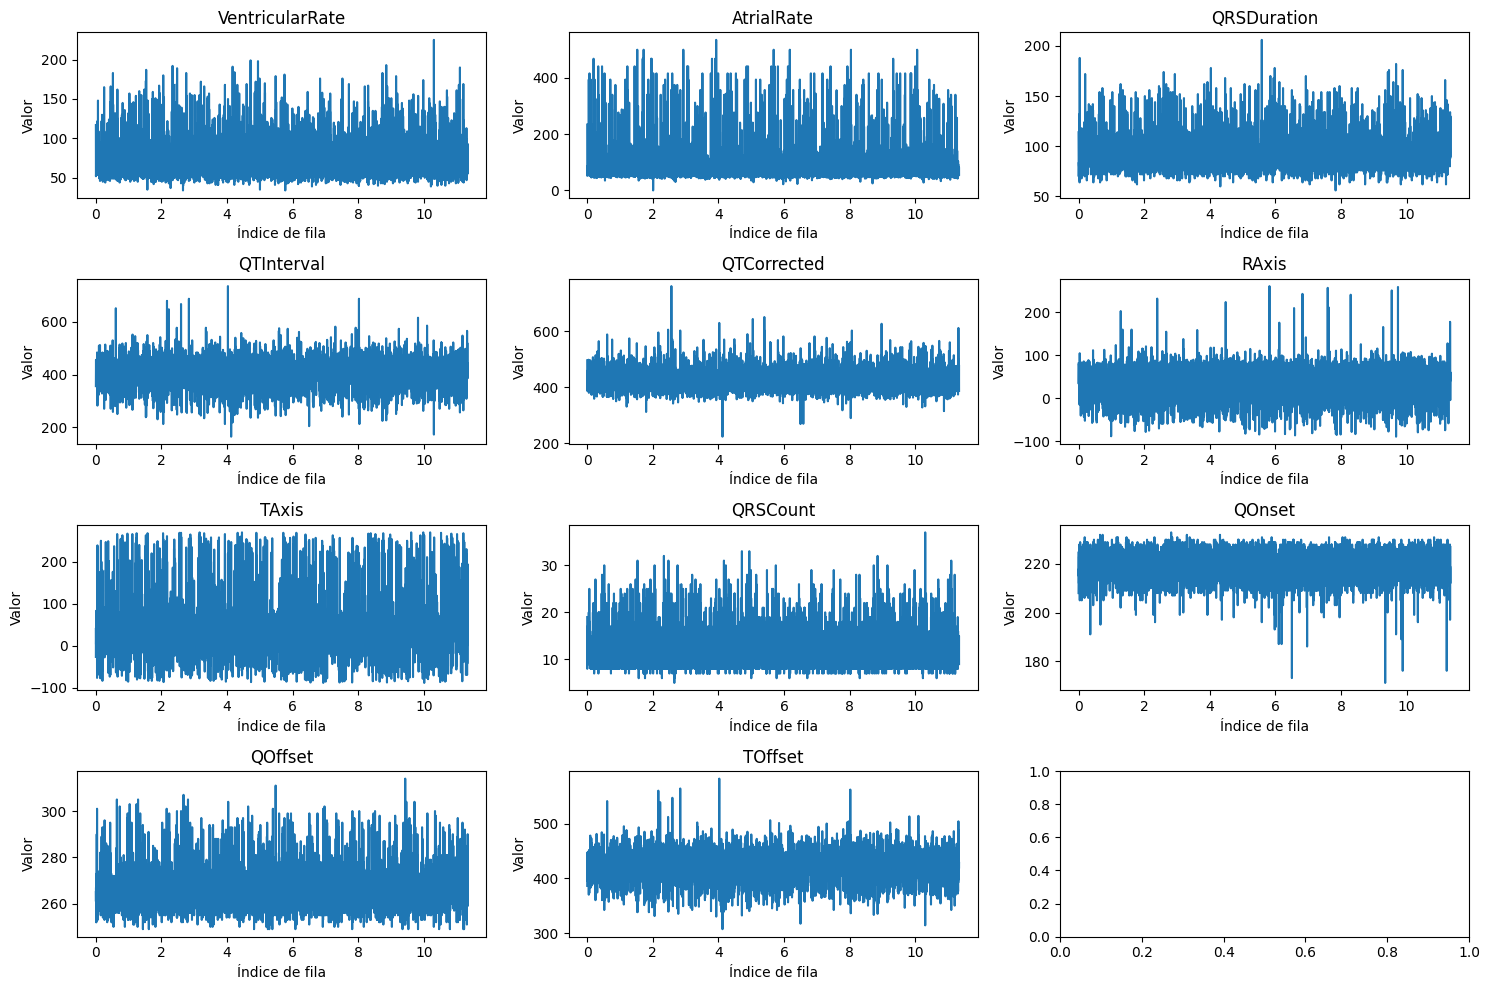

In [76]:
# Definir las columnas que quieres graficar
start_col = 5  # Columna 6 (índice 5)
end_col = 16   # Última columna (índice 15)

# Calcular el número de señales a graficar
num_signals = end_col - start_col + 1  # Número de columnas desde la 6 hasta la última
cols = 3  # Número de columnas que quieres en la figura

# Calcular el número de filas necesarias
if (num_signals % cols) != 0:
    rows = num_signals // cols + 1  # Añadir una fila extra si hay resto
else:
    rows = num_signals // cols  # Si no hay resto, las filas son exactas

# Crear una figura con el número de filas y columnas calculado
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

# Seleccionar las columnas que se van a graficar desde 'start_col' hasta 'end_col'
columns = datos.columns[start_col:end_col + 1]  # +1 para incluir la última columna

# Ajustar el espaciado entre los subplots
# plt.subplots_adjust(hspace=0.6, wspace=0.4)

# x=np.zeros(len(datos["QOffset"]))

# Graficar cada columna en su subplot correspondiente
for i in range(rows):  # Recorrer las filas
    for j in range(cols):  # Recorrer las columnas
        col_index = i * cols + j  # Índice para las columnas seleccionadas
        if col_index < len(columns):  # Verificar si hay suficientes columnas
            col_name = columns[col_index]  # Obtener el nombre de la columna actual
            axs[i, j].plot(tiempo,datos[col_name])  # Graficar la columna actual
            # axs[i, j].plot(tiempo,x,label='Señal con Detrend', color='red')  # Graficar la columna actual
            axs[i, j].set_title(f'{col_name}')  # Título con el nombre de la columna
            axs[i, j].set_xlabel('Índice de fila')  # Etiqueta del eje X
            axs[i, j].set_ylabel('Valor')  # Etiqueta del eje Y

plt.tight_layout()
# Mostrar la figura con los subplots
plt.show()


### Formula 1

In [60]:
# def eq_deviation(x0, k): #x0 original, xn detrended, k tamaña señal
def eq_deviation(x0): #x0 original, xn detrended, k tamaña señal
    xn=x0.copy()
    cols_to_detrend = x0.columns[5:]  # Seleccionamos desde la columna 6 en adelante

    # Aplicamos detrend a cada columna seleccionada
    for col in cols_to_detrend:
        xn[col] = signal.detrend(x0[col])
    
    
        # xn = signal.detrend(x0, axis=0)
    
    # # Verificar que x0 y xn tengan al menos k elementos
    # if len(x0) < k or len(xn) < k:
    #     raise ValueError("Las listas deben tener al menos k elementos.")
    
    # # Inicializar la suma
    # suma = 0
    
    # # Realizar la sumatoria
    # for i in range(k):
    #     suma += (x0[i] - xn[i]) ** 2
    
    # # Calcular el valor de la ecuación
    # resultado = (1 / k) * suma
    
    #Forma mas simplificada
    resultado = np.mean((x0[cols_to_detrend] - xn[cols_to_detrend]) ** 2)
    

    return resultado


In [62]:
print(eq_deviation(datos))

2.8992745515095755e-27
